In [197]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

 Load the dataset and perform an initial inspection to understand its structure, size, and available features

In [198]:
df = pd.read_csv('../data/raw/churn_raw.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataset contains customer-level information related to churn behavior and includes:

- Churn status:
   Indicates whether a customer left the company within the last month (Churn).

- Subscribed services:
   Details about services each customer has signed up for, including phone service,
   multiple lines, internet service, online security, online backup, device protection,
   technical support, and streaming TV and movies.

- Customer account information:
   Information about customer tenure, contract type, payment method, paperless billing,
   monthly charges, and total charges.

- Demographic characteristics:
   Basic demographic attributes such as gender, age group (senior citizen indicator),
   and whether the customer has a partner or dependents.


In [199]:
df.shape

(7043, 21)

In [200]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')

Inspect dataset structure, data types, and missing values

In [201]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

The target variable (Churn) is used to guide the exploratory analysis

TotalCharges appears to be numerical but is stored as an object, which prevents it from being included in numerical summary statistics


In [202]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [247]:
df.duplicated().sum()

np.int64(0)

Convert TotalCharges to numeric format and coerce invalid values to NaN

In [203]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Visualize missing values

<Axes: >

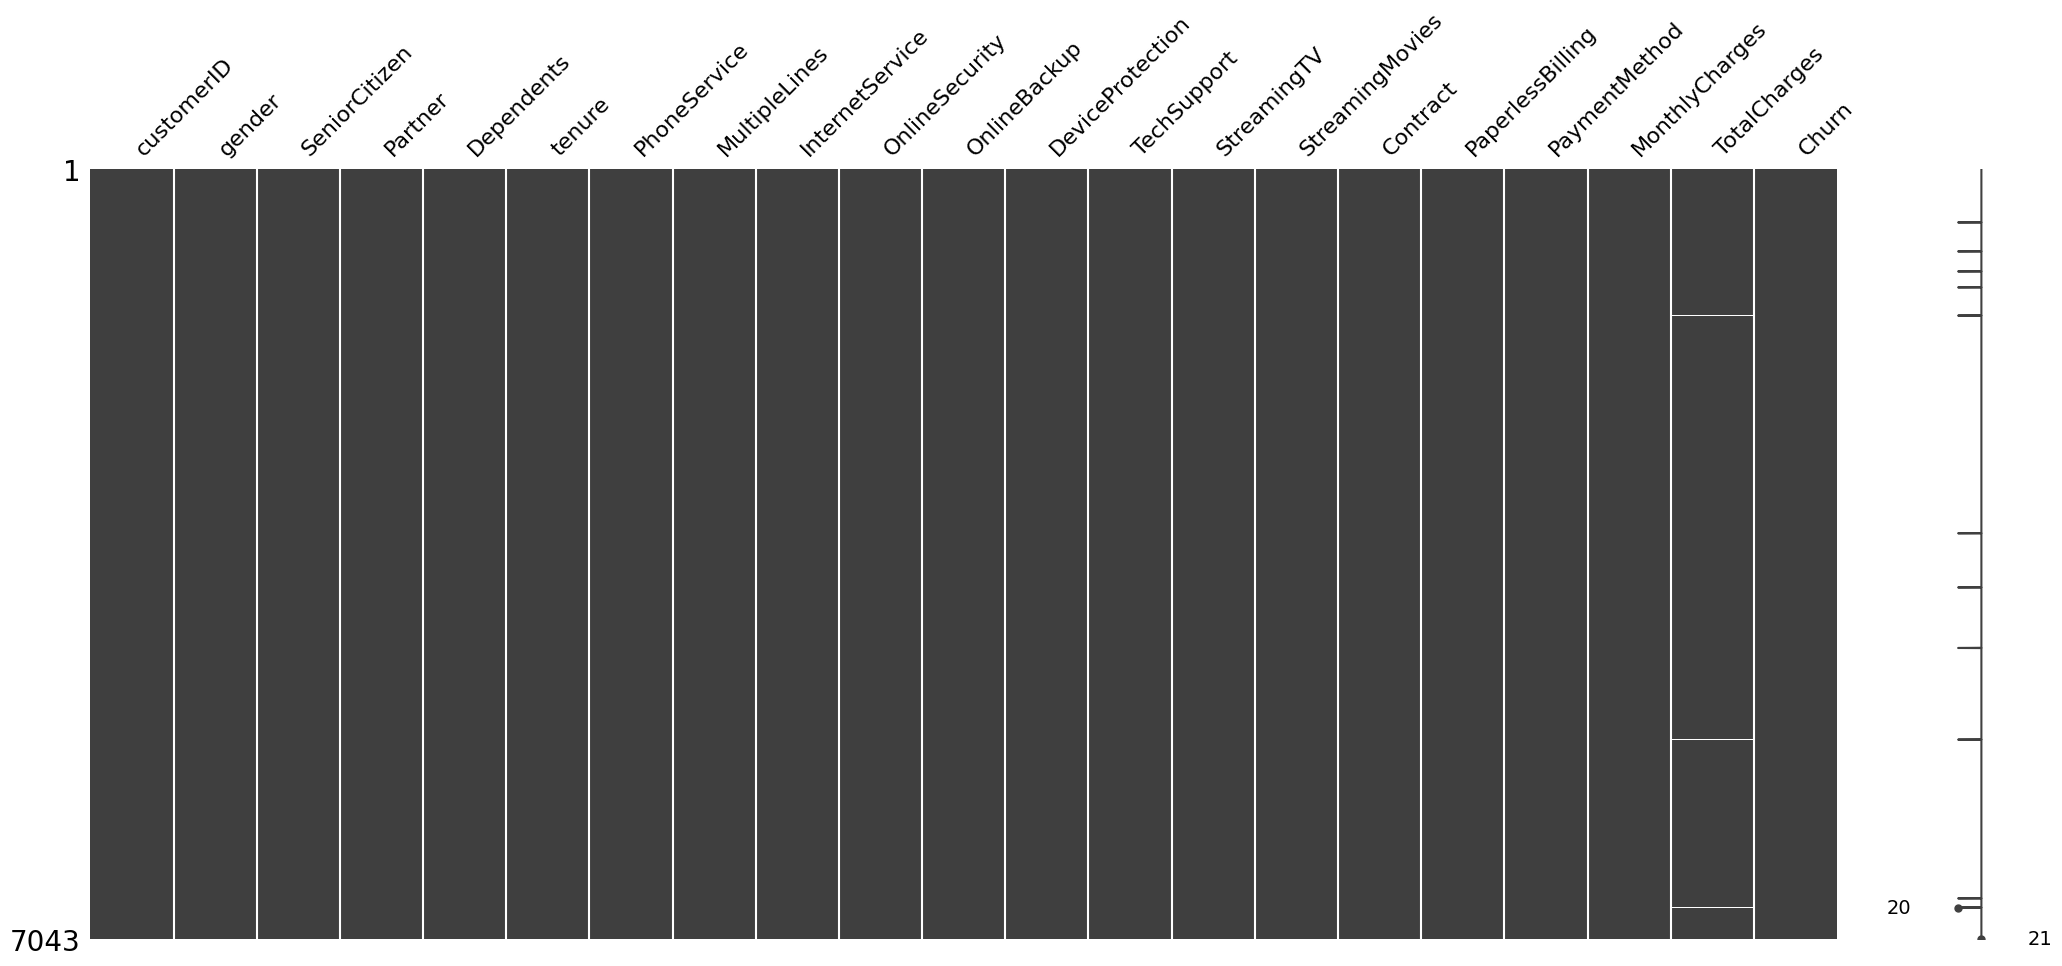

In [204]:
msno.matrix(df=df)

In [205]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The visualization indicates that a small number of missing values are present in the TotalCharges column

In [206]:
df['TotalCharges'].isna().sum()

np.int64(11)

A total of 11 rows contain missing values in the TotalCharges column

Inspect rows with missing values in the TotalCharges column

In [207]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Missing TotalCharges values correspond to customers with zero tenure,
indicating that no charges have been accumulated yet

Fill missing TotalCharges values with 0 for customers with zero tenure

In [208]:
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = 0
df['TotalCharges'].isna().sum()

np.int64(0)

In [209]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Target-driven exploratory analysis
Explore relationships between features and the target variable (Churn)
using visualizations and summary statistics before preprocessing


In [210]:
churn_share = df['Churn'].value_counts(normalize=True).mul(100).reset_index()
churn_share.columns = ['Churn', 'Percentage']
churn_share

,Churn,Percentage
0,No,73.463013
1,Yes,26.536987


In [211]:
fig = px.pie(
    churn_share,
    values='Percentage',
    names='Churn',
    title='Churn Distribution (%)',
    width=500,
    height=500
)

fig.update_traces(
    texttemplate="%{value:.2f}%",
    hovertemplate="%{label}<br>%{value:.2f}%<extra></extra>"
)

fig.show()

In [212]:
churn_vs_gender = pd.crosstab(df['Churn'], df['gender'])

In [213]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

gender_counts = df['gender'].value_counts().reindex(g_labels)
churn_counts = df['Churn'].value_counts().reindex(c_labels)

fig = make_subplots(
    rows=1,
    cols=2,
    specs=[[{'type': 'domain'}, {'type': 'domain'}]]
)

fig.add_trace(
    go.Pie(
        labels=g_labels,
        values=gender_counts,
        name="Gender"
    ),
    1, 1
)

fig.add_trace(
    go.Pie(
        labels=c_labels,
        values=churn_counts,
        name="Churn"
    ),
    1, 2
)

fig.update_traces(
    hole=0.4,
    hoverinfo="label+value+name",  # 🔥 ВАЖНО: value, а не percent
    textinfo="label+value",
    textfont_size=16
)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[
        dict(text='Gender', x=0.18, y=0.51, font_size=20, showarrow=False),
        dict(text='Churn', x=0.81, y=0.51, font_size=20, showarrow=False)
    ]
)

fig.show()


In [214]:
fig = px.histogram(
    df,
    x='Churn',
    color='SeniorCitizen',
    barmode='group',
    title='Customer citizen distribution',
    labels={
        'SeniorCitizen': 'Senior Citizen',
        'Churn': 'Churn'
    },
    category_orders={
        'SeniorCitizen': [0, 1]
    }
)

fig.for_each_trace(
    lambda t: t.update(name='No' if t.name == '0' else 'Yes')
)

fig.show()


In [215]:
fig = px.histogram(
    df, 
    x='Churn', 
    color='Partner', 
    barmode='group', 
    title='Customer partner distribution')

fig.show()

In [216]:
fig = px.histogram(
    df,
    x ='Churn',
    color='Dependents',
    barmode='group',
    title='Customer dependents distribution'
)

fig.show()

In [217]:
fig = px.histogram(
    df,
    x ='Churn',
    color='PhoneService',
    #barmode='group',
    title='Customer phone service distribution'
)

fig.show()

In [218]:
fig = px.histogram(
    df,
    x ='Churn',
    color='MultipleLines',
    #barmode='group',
    title='Churn rate by multiple lines'
)

fig.show()

In [219]:
# rate = (
#     pd.crosstab(
#         df['InternetService'],
#         df['Churn'],
#         normalize='index'
#     )['Yes']
#     .reset_index(name='Churn rate')
# )
# rate
def churn_rate_by_feature(
    df: pd.DataFrame,
    feature: str,
    target: str = 'Churn',
    positive: str = 'Yes'
) -> pd.DataFrame:
    """
    Calculate churn rate by categorical feature.

    Returns DataFrame with:
    - feature
    - Churn rate (P(Churn=Yes | feature))
    """
    rate = (
        pd.crosstab(
            df[feature],
            df[target],
            normalize='index'
        )[positive]
        .reset_index(name='Churn rate')
        .sort_values('Churn rate', ascending=False)
    )

    return rate


In [220]:
rate = churn_rate_by_feature(df, 'InternetService')
rate

,InternetService,Churn rate
1,Fiber optic,0.418928
0,DSL,0.189591
2,No,0.074050


In [221]:
fig = px.bar(
    rate,
    x='InternetService',
    y='Churn rate',
    title='Churn Rate by Internet Service'
)

fig.update_layout(
    yaxis_tickformat='.0%',
    yaxis_title='Churn rate'
)

fig.show()


The churn rate was calculated as the proportion of churned customers within each internet service category and visualized to compare churn risk across groups.

In [222]:
rate= churn_rate_by_feature(df, 'OnlineSecurity')
rate

,OnlineSecurity,Churn rate
0,No,0.417667
2,Yes,0.146112
1,No internet service,0.074050


In [223]:
fig = px.bar(
    rate,
    x='OnlineSecurity',
    y='Churn rate',
    title='Churn Rate by Online Security'
)

fig.update_layout(
    yaxis_tickformat='.0%',
    yaxis_title='Churn rate'
)

fig.show()


In [224]:
fig = px.histogram(
    df,
    x='OnlineSecurity',
    color='Churn',
    barnorm='percent',
    title='Churn Distribution by Online Security'
)

fig.update_layout(
    yaxis_title='Percentage'
)

fig.show()

Customers without online security exhibit a substantially higher churn rate compared to other groups.
The normalized stacked bar chart visually confirms this difference in churn proportions.

In [225]:
rate = churn_rate_by_feature(df, 'OnlineBackup')
rate

,OnlineBackup,Churn rate
0,No,0.399288
2,Yes,0.215315
1,No internet service,0.074050


In [226]:
fig = px.bar(
    rate,
    x='OnlineBackup',
    y='Churn rate',
    title='Churn rate by Online backup'
)

fig.update_layout(
    yaxis_tickformat='.0%',
    yaxis_title='Churn rate'
)

fig.show()

Customers without online backup have a substantially higher churn rate compared to those with online backup enabled.
Customers without internet service exhibit the lowest churn risk.

In [227]:
fig = px.histogram(
    df,
    x='OnlineBackup',
    color='Churn',
    barnorm='percent',
    title='Churn Distribution by Online backup(normalized)'
)

fig.update_layout(
    yaxis_title='Percentage'
)

fig.show()

In [228]:
rate = churn_rate_by_feature(df, 'DeviceProtection')
rate

,DeviceProtection,Churn rate
0,No,0.391276
2,Yes,0.225021
1,No internet service,0.074050


In [229]:
fig = px.bar(rate,
             x='DeviceProtection',
             y='Churn rate',
             title='Churn rate by Device protection'
)

fig.update_layout(
    yaxis_tickformat='.0%',
    yaxis_title='Churn rate'
)

fig.show()

Customers without device protection exhibit a substantially higher churn rate compared to customers with device protection enabled.
This indicates that device protection is strongly associated with lower churn risk.

In [230]:
fig = px.histogram(
    df,
    x='DeviceProtection',
    color='Churn',
    barnorm='percent',
    title='Churn Distribution by Device protection(normalized)'
)

fig.update_layout(
    yaxis_title='Percentage'
)

fig.show()

In [231]:
rate = churn_rate_by_feature(df, 'TechSupport')
rate

,TechSupport,Churn rate
0,No,0.416355
2,Yes,0.151663
1,No internet service,0.074050


In [232]:
#ETHALON
fig = px.bar(rate,
             x='TechSupport',
             y='Churn rate',
             title='Churn rate by tech support'
             )

fig.update_layout(
    yaxis_title='Churn rate'
)

fig.update_traces(
    texttemplate='%{y:.1%}',
    textposition='outside'
)

fig.update_yaxes(tickformat='.0%')
fig.show()

Customers without technical support exhibit a substantially higher churn rate compared to those with technical support enabled.
This suggests that access to technical support is strongly associated with reduced churn risk.

In [233]:
# StreamingTV         0
# StreamingMovies     0
# Contract            0
# PaperlessBilling    0
# PaymentMethod       0
# MonthlyCharges      0
# TotalCharges        0
# Churn               0

fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.6, 0.4],
    subplot_titles=[
        'Churn Rate by Tech Support',
        'Churn Distribution by Tech Support'
    ]
)

# Churn rate
rate = churn_rate_by_feature(df, 'TechSupport')

bar_fig = px.bar(
    rate,
    x='TechSupport',
    y='Churn rate'
)

for trace in bar_fig.data:
    fig.add_trace(trace, row=1, col=1)

fig.update_yaxes(
    tickformat='.0%',
    title_text='Churn rate',
    row=1, col=1
)

# Overall data
hist_fig = px.histogram(
    df,
    x='TechSupport',
    color='Churn',
    barnorm='percent'
)

for trace in hist_fig.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_yaxes(
    title_text='Number of customers',
    row=2, col=1
)

fig.update_layout(height=700, barmode='stack')
fig.show()


Churn rate analysis shows that customers without technical support have the highest risk of churn.
A normalized stacked bar chart further confirms that a substantially larger proportion of customers without technical support churn compared to other groups.

In [234]:
# StreamingMovies     0
# Contract            0
# PaperlessBilling    0
# PaymentMethod       0
# MonthlyCharges      0
# TotalCharges        0
# Churn               0

fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.6, 0.4],
    subplot_titles=[
        'Churn Rate by streamingTV',
        'Churn Distribution by streamingTV'
    ]
)

# Churn rate
rate = churn_rate_by_feature(df, 'StreamingTV')

bar_fig = px.bar(
    rate,
    x='StreamingTV',
    y='Churn rate'
)

for trace in bar_fig.data:
    fig.add_trace(trace, row=1, col=1)

fig.update_yaxes(
    tickformat='.0%',
    title_text='Churn rate',
    row=1, col=1
)

# Overall data
hist_fig = px.histogram(
    df,
    x='StreamingTV',
    color='Churn',
    barnorm='percent'
)

for trace in hist_fig.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_yaxes(
    title_text='Number of customers',
    row=2, col=1
)

fig.update_layout(height=700, barmode='stack')
fig.show()


In [235]:
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.6, 0.4],
    subplot_titles=[
        'Churn Rate by streaming movies',
        'Churn Distribution by streaming movies'
    ]
)

# Churn rate
rate = churn_rate_by_feature(df, 'StreamingMovies')

bar_fig = px.bar(
    rate,
    x='StreamingMovies',
    y='Churn rate'
)

for trace in bar_fig.data:
    fig.add_trace(trace, row=1, col=1)

fig.update_yaxes(
    tickformat='.0%',
    title_text='Churn rate',
    row=1, col=1
)

# Overall data
hist_fig = px.histogram(
    df,
    x='StreamingMovies',
    color='Churn',
    barnorm='percent'
)

for trace in hist_fig.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_yaxes(
    title_text='Number of customers',
    row=2, col=1
)

fig.update_layout(height=700, barmode='stack')
fig.show()

Streaming services (TV and Movies) show only a minor difference in churn rates between subscribers and non-subscribers, suggesting that content-related features have limited impact on customer retention compared to service and support-related features.

In [236]:
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.6, 0.4],
    subplot_titles=[
        'Churn Rate by contract',
        'Churn Distribution by contract'
    ]
)

# Churn rate
rate = churn_rate_by_feature(df, 'Contract')

bar_fig = px.bar(
    rate,
    x='Contract',
    y='Churn rate'
)

for trace in bar_fig.data:
    fig.add_trace(trace, row=1, col=1)

fig.update_yaxes(
    tickformat='.0%',
    title_text='Churn rate',
    row=1, col=1
)

# Overall data
hist_fig = px.histogram(
    df,
    x='Contract',
    color='Churn',
    barnorm='percent'
)

for trace in hist_fig.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_yaxes(
    title_text='Number of customers',
    row=2, col=1
)

fig.update_layout(height=700, barmode='stack')
fig.show()

Contract type is the strongest predictor of churn. Customers on month-to-month contracts exhibit significantly higher churn rates compared to those on one-year or two-year contracts, highlighting the importance of long-term commitment in customer retention.

In [237]:
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.6, 0.4],
    subplot_titles=[
        'Churn Rate by paperless billing',
        'Churn Distribution by paperless billing'
    ]
)

# Churn rate
rate = churn_rate_by_feature(df, 'PaperlessBilling')

bar_fig = px.bar(
    rate,
    x='PaperlessBilling',
    y='Churn rate'
)

for trace in bar_fig.data:
    fig.add_trace(trace, row=1, col=1)

fig.update_yaxes(
    tickformat='.0%',
    title_text='Churn rate',
    row=1, col=1
)

# Overall data
hist_fig = px.histogram(
    df,
    x='PaperlessBilling',
    color='Churn',
    barnorm='percent'
)

for trace in hist_fig.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_yaxes(
    title_text='Number of customers',
    row=2, col=1
)

fig.update_layout(height=700, barmode='stack')
fig.show()

Customers using paperless billing exhibit significantly higher churn rates compared to those receiving paper bills. This feature likely reflects a more flexible, price-sensitive customer segment rather than being a direct cause of churn.

In [238]:
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.6, 0.4],
    subplot_titles=[
        'Churn Rate by payment method',
        'Churn Distribution by payment method'
    ]
)

# Churn rate
rate = churn_rate_by_feature(df, 'PaymentMethod')

bar_fig = px.bar(
    rate,
    x='PaymentMethod',
    y='Churn rate'
)

for trace in bar_fig.data:
    fig.add_trace(trace, row=1, col=1)

fig.update_yaxes(
    tickformat='.0%',
    title_text='Churn rate',
    row=1, col=1
)

# Overall data
hist_fig = px.histogram(
    df,
    x='PaymentMethod',
    color='Churn',
    barnorm='percent'
)

for trace in hist_fig.data:
    fig.add_trace(trace, row=2, col=1)

fig.update_yaxes(
    title_text='Number of customers',
    row=2, col=1
)

fig.update_layout(height=700, barmode='stack')
fig.show()

Payment method strongly correlates with churn. Customers using electronic checks exhibit significantly higher churn rates compared to those using automatic payment methods, suggesting that payment friction and lower commitment contribute to customer attrition.

In [239]:
rate = (
    pd.crosstab(
        pd.qcut(df['MonthlyCharges'], q=10, duplicates='drop'),
        df['Churn'],
        normalize='index'
    )['Yes']
    .reset_index(name='Churn rate')
)
rate

,MonthlyCharges,Churn rate
0,"(18.249, 20.05]",0.085077
1,"(20.05, 25.05]",0.098151
2,"(25.05, 45.85]",0.254676
3,"(45.85, 58.83]",0.245014
4,"(58.83, 70.35]",0.215190
5,"(70.35, 79.1]",0.381429
6,"(79.1, 85.5]",0.378723
7,"(85.5, 94.25]",0.343305
8,"(94.25, 102.6]",0.409091
9,"(102.6, 118.75]",0.247159


In [240]:
rate = rate.copy()
rate['MonthlyCharges'] = rate['MonthlyCharges'].astype(str)

In [241]:
fig = px.bar(
    rate,
    x='MonthlyCharges',
    y='Churn rate',
    title='Churn Rate by Monthly Charges (binned)'
)

fig.update_yaxes(tickformat='.0%')
fig.show()


In [242]:
fig = px.histogram(
    df,
    x='MonthlyCharges',
    color='Churn',
    nbins=30,
    title='Monthly Charges Distribution by Churn',
)
fig.update_layout(
    bargap=0.1
)
fig.show()


Churn rate increases significantly with higher monthly charges. Customers in the highest pricing tiers exhibit churn rates exceeding 35–40%, indicating strong price sensitivity and potential dissatisfaction among high-paying customers.

In [243]:
df[['TotalCharges', 'tenure']].corr()


,TotalCharges,tenure
TotalCharges,1.000000,0.826178
tenure,0.826178,1.000000


TotalCharges is highly correlated with tenure, therefore its distribution mainly reflects customer lifetime rather than independent spending behavior.

In [244]:
fig = px.histogram(
    df,
    x='TotalCharges',
    color='Churn',
    nbins=30,
    title='Total Charges Distribution by Churn'
)

fig.update_layout(bargap=0.08)
fig.show()


Customers who churn tend to have low total charges, reflecting short customer tenure rather than lower spending behavior. High total charges are primarily observed among long-tenure customers who have already remained with the company for an extended period.

## Key EDA Insights

- Churn is significantly higher for month-to-month contracts
- Customers without TechSupport and OnlineSecurity churn more frequently
- Higher MonthlyCharges are associated with higher churn
- TotalCharges is highly correlated with tenure (r=0.83) and will not be used in modeling


## Feature Selection Decisions

- Drop TotalCharges due to strong correlation with tenure
- Keep MonthlyCharges as independent pricing signal
- Encode categorical features using One-Hot Encoding


<Axes: >

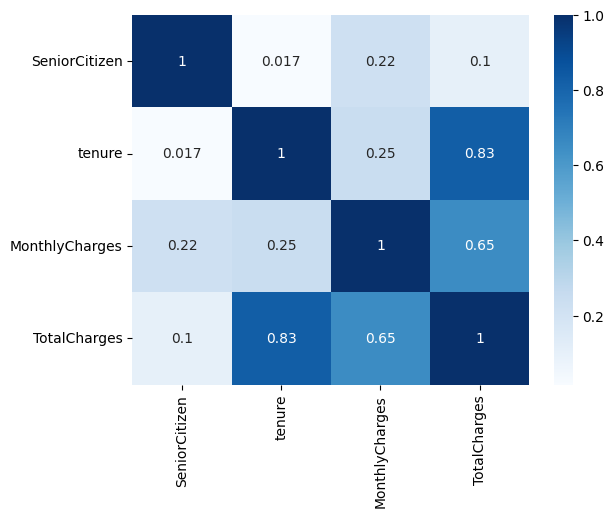

In [245]:
correlation_matrix = df.select_dtypes(include='number').corr()

sns.heatmap(correlation_matrix, annot=True, cmap='Blues')